In [2]:
import seaborn as sns
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt


In [3]:
%matplotlib inline
plt.rcParams['font.sans-serif']=['AR PL UKai CN'] #用来正常显示中文标签 
plt.rcParams['font.family'] ='AR PL UKai CN'
plt.rcParams["axes.unicode_minus"]=False


In [4]:
import config
import json
import codecs

In [69]:
str1 ='改革开放以来，中国出现了翻天地覆的变化，党员李晓红说到。'
str_list = list(str1)
with codecs.open("sentence.json", 'w', 'utf-8') as f1:
    json.dump(str_list, f1, ensure_ascii=False)

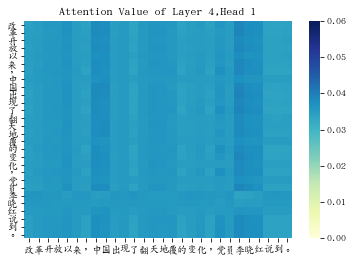

In [14]:
# 首先进行attention 热力图的绘制
# 首先拿到 attention_weight [layer_num,head,seq_len,seq_len]
# 还要拿到当前输入的序列 [seq_len] 列表
atten_weight = np.load('vanilla_attention.npy')
with codecs.open('sentence.json','r','utf-8') as f:
    input_sentence = json.load(f)
# 选择当前要查看的是哪一层的数据
layer = 3
current_layer_atten_weight = atten_weight[layer]
head = 0
single_head_atten_weight = current_layer_atten_weight[head]
#print(single_head_atten_weight.max(),single_head_atten_weight.min())
#print(single_head_atten_weight)
sns.heatmap(single_head_atten_weight,vmin=0,vmax=0.06,
             xticklabels=input_sentence,yticklabels=input_sentence,cmap='YlGnBu')
plt.xticks(rotation=360)
plt.title("Attention Value of Layer 4,Head 1")
plt.show()

No handles with labels found to put in legend.


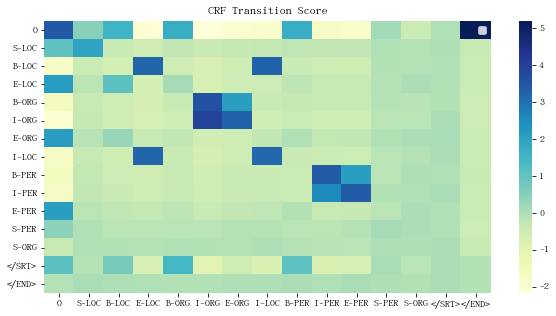

In [5]:
transition = np.load('transition_matrix.npy')
tag_path = '/home/wqt/char_model/data/MSRA/tag_vocab/vocab_list.txt'
with codecs.open(tag_path,'r','utf-8') as f:
    tag_list = json.load(f)
tag_list += ['</SRT>']
tag_list += ['</END>']
plt.figure(figsize=(10,5))
sns.heatmap(transition,
             xticklabels=tag_list,yticklabels=tag_list,cmap='YlGnBu')
plt.title("CRF Transition Score")
plt.xticks(rotation=360)
plt.legend()
plt.show()


[[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]]
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28]


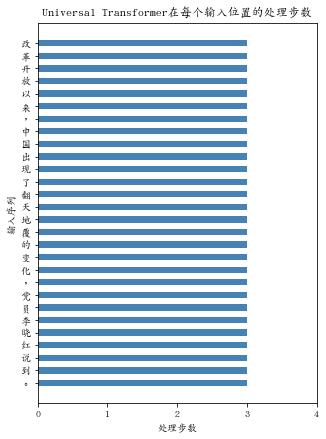

In [28]:
# 进行universal模型 处理步数的展示
# 还是得拿到当前输入的数据：
universal_updates = np.load('universal_updates.npy').astype(int)
print(universal_updates)
with codecs.open('sentence.json','r','utf-8') as f:
    input_sentence = json.load(f)
input_sentence.reverse()
universal_updates = universal_updates.squeeze()[::-1]
# step2：手动创建一个figure对象，相当于一个空白的画布
figure = plt.figure(figsize=(5,7))
# step3：在画布上添加1个子块，标定绘图位置
axes1 = plt.subplot(1, 1, 1)
# step4：绘制条形图
y = np.arange(1,len(input_sentence) + 1)
print(y)
plt.xlim((0, 4))
plt.xticks(np.arange(0,5))
axes1.barh(y, universal_updates, height=0.5,tick_label=input_sentence,color='steelblue')
# step5：条形图基本属性设置
axes1.set_xlabel('处理步数')
axes1.set_ylabel('输入序列')
plt.title("Universal Transformer在每个输入位置的处理步数")
plt.show()

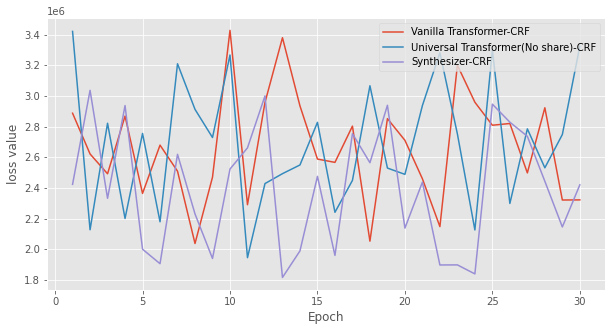

In [4]:
vanilla_loss = [2886907.5, 2621149.0, 2491684.75, 2868211.0, 2363463.0, 2678680.25, 2508595.75, 2036975.25, 2469461.25, 3427498.0, 2290077.0, 2957047.75, 3379525.75, 2934540.0, 2587774.25, 2566165.75, 2802680.75, 2052220.0, 2851470.25, 2710127.0, 2459195.0, 2147038.25, 3200288.0, 2958545.75, 2808522.25, 2819824.0, 2497576.75, 2922407.0, 2320618.25, 2321425.5]
universal_share_loss = [3863695.75, 2789943.75, 2796045.0, 2145602.75, 2813935.0, 2001954.125, 2564730.5, 2562397.25, 2182777.0, 3335000.0, 2297792.5, 2292508.75, 2169018.25, 2546738.0, 2403735.0, 3408521.75, 2319351.75, 3379576.0, 3079021.5, 3279556.75, 2398820.25, 3251805.75, 2133239.25, 3280373.0, 3082124.0, 1974726.25, 3439274.5, 3158704.0, 3228419.25, 2557815.75]
universal_no_share_loss = [3420660.25, 2126520.0, 2821406.75, 2200218.75, 2755021.75, 2178567.0, 3209516.75, 2911989.5, 2728348.25, 3266703.75, 1944445.75, 2427869.5, 2492528.0, 2549260.0, 2827370.5, 2240540.25, 2448539.75, 3065996.0, 2529109.75, 2487948.25, 2936897.75, 3281630.0, 2751849.5, 2125306.5, 3299476.25, 2298180.5, 2784873.25, 2530838.75, 2747895.25, 3323928.75]
syn_loss=[2422816.0, 3036209.25, 2331636.0, 2936880.5, 1999610.125, 1905075.625, 2618672.75, 2229768.0, 1939104.625, 2522585.0, 2661013.75, 2999616.5, 1815429.125, 1988551.875, 2474785.5, 1959286.0, 2753731.25, 2563944.0, 2938647.0, 2137273.5, 2437274.25, 1896748.75, 1897352.625, 1838566.0, 2945937.25, 2828269.0, 2736161.5, 2442821.75, 2144822.75, 2419639.25]
syn_fr_loss=[2985539.5, 2895149.25, 2730682.75, 2929171.75, 2723282.0, 2342797.75, 2903449.5, 1905110.25, 2389830.0, 1815835.875, 2860750.0, 1878835.0, 2119653.25, 1798872.875, 3089402.25, 2763313.0, 2676270.5, 2973726.25, 2289276.25, 2012336.75, 2922629.5, 2069638.625, 2023879.0, 2543836.0, 2731071.0, 1807899.875, 1847877.0, 1861877.25, 2988791.75, 3033223.0]
x = range(1,len(vanilla_loss)+1)
#plt.ylim((1000000, 4000000))
plt.style.use('ggplot')
plt.figure(figsize=(10,5))
#plt.title("Loss of Models on MSRA Dataset")
plt.xlabel("Epoch")
plt.ylabel("loss value")
plt.plot(x,vanilla_loss,'-',label='Vanilla Transformer-CRF')
#plt.plot(x,universal_share_loss,'-',label='Universal Transformer')
plt.plot(x,universal_no_share_loss,'-',label='Universal Transformer(No share)-CRF')
plt.plot(x,syn_loss,"-",label="Synthesizer-CRF")
#plt.plot(x,syn_fr_loss,"-",label="syn_fr")
plt.legend(loc="upper right")
plt.grid(True)


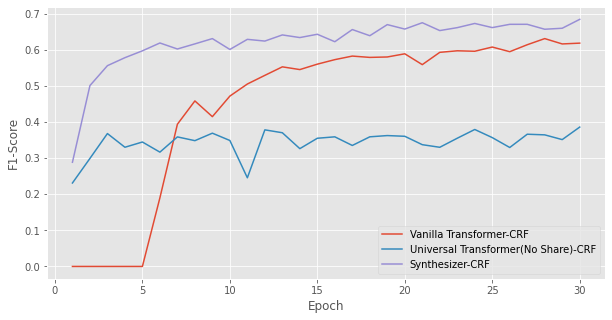

In [5]:
vanilla_f1=[0, 0, 0, 0, 0, 0.1900596421471173, 0.3938386136880798, 0.45836939588021464, 0.414833215046132, 0.47178740444120854, 0.5052234971741737, 0.5292006525285481, 0.5527700402352212, 0.5452054794520548, 0.5602135343067985, 0.5727243278263685, 0.5825806451612904, 0.5789234268385139, 0.5800950975569765, 0.5888799355358583, 0.5588938204165244, 0.5929344366645449, 0.5972265023112481, 0.5959443099273609, 0.6075949367088608, 0.594756554307116, 0.6139947940591027, 0.6309974747474747, 0.616198347107438, 0.6184170003079766]
share_f1 =[0.2344249201277955, 0.27356675644478645, 0.27760134504016437, 0.3508322663252241, 0.3459707282666197, 0.32595501606569083, 0.3118259915920307, 0.344419807834442, 0.3417813178855902, 0.3163548805334321, 0.3184573002754821, 0.3704998252359315, 0.3388728323699422, 0.3546572934973638, 0.34187122020633226, 0.34894872740686095, 0.31318579133345736, 0.33141370982723384, 0.3465206640762981, 0.3355580274378939, 0.32744490985248587, 0.3132749817651349, 0.36489767603191126, 0.3245406585410224, 0.3668000696015313, 0.33935529578462625, 0.3347794649313087, 0.3643668122270743, 0.34101719721917306, 0.345679012345679]
no_share_f1 = [0.23110580747812254, 0.2991483321504613, 0.36801107841440195, 0.3301073376737639, 0.34460271151535954, 0.31655992680695333, 0.35876145995502506, 0.34833659491193736, 0.36906424581005587, 0.34882083773319256, 0.24554455445544554, 0.3782571182053494, 0.3702564102564102, 0.32623853211009174, 0.3549965059399022, 0.3589484327603641, 0.3350524630979904, 0.3589924255768892, 0.36243093922651937, 0.3604610548375829, 0.3372113835689995, 0.3299835556367623, 0.3550941404187929, 0.3792982456140351, 0.3568376068376068, 0.32939914163090134, 0.3661726242371403, 0.3644214162348877, 0.35128888888888893, 0.3859530643255107]
syn_f1=[0.28854219090756583, 0.5008919015340706, 0.5560095335376234, 0.5781433607520564, 0.5971337579617835, 0.6188530791345135, 0.602203182374541, 0.616355894875936, 0.630967336683417, 0.6009389671361502, 0.6289156626506023, 0.6241480038948394, 0.6411527734738147, 0.6338470746670657, 0.6429922864211906, 0.622356495468278, 0.6560441244063122, 0.6389817024661893, 0.6697315734836127, 0.65738244983528, 0.6749555950266429, 0.6532163742690058, 0.6613290632506005, 0.6729356450191007, 0.6614607257694075, 0.670509977827051, 0.6705593116164721, 0.6568931491401184, 0.6596607116048642, 0.6842837273991655]
x = range(1,len(vanilla_loss)+1)
#plt.ylim((1000000, 4000000))
plt.style.use('ggplot')
plt.figure(figsize=(10,5))
#plt.title("F1-Score of Models on MSRA Dev Dataset")
plt.xlabel("Epoch")
plt.ylabel("F1-Score")
plt.plot(x,vanilla_f1,'-',label='Vanilla Transformer-CRF')
plt.plot(x,no_share_f1,'-',label='Universal Transformer(No Share)-CRF')
plt.plot(x,syn_f1,'-',label='Synthesizer-CRF')
plt.legend()
plt.grid(True)

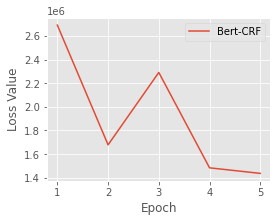

In [6]:
bert_crf_loss =[2691270.75, 1677925.875, 2290871.25, 1483434.375, 1436331.625]
bert_softmax_loss=[170055.359375, 72295.359375, 43770.12890625, 31026.365234375, 22207.75]
bert_crf_f1=[0.9256622045001425, 0.9435723377174374, 0.9614454403186798, 0.9665575636829372, 0.9739872068230278]
bert_softmax_f1=[0.9210181818181818, 0.9449672084402624, 0.9607396870554765, 0.9669304691916337, 0.9758041559920296]
x = range(1,len(bert_crf_loss)+1)
#plt.ylim((1000000, 4000000))
plt.style.use('ggplot')
plt.figure(figsize=(4,3))
#plt.title("Loss of Bert Model")
plt.xlabel("Epoch")
plt.ylabel("Loss Value")
plt.plot(x,bert_crf_loss,'-',label='Bert-CRF')
#plt.plot(x,bert_softmax_loss,'-',label='Bert-Softmax-Loss')
# plt.plot(x,bert_crf_f1,'-',label='Vanilla Transformer')
# plt.plot(x,share_f1,'-',label='Universal Transformer')
# plt.plot(x,no_share_f1,'-',label='Universal Transformer-No share')
plt.legend()
plt.grid(True)


In [7]:
bert_crf_f1=[0.9256622045001425, 0.9435723377174374, 0.9614454403186798, 0.9665575636829372, 0.9739872068230278]
bert_softmax_f1=[0.9210181818181818, 0.9449672084402624, 0.9607396870554765, 0.9669304691916337, 0.9758041559920296]
x = range(1,len(bert_crf_loss)+1)
#plt.ylim((1000000, 4000000))
plt.style.use('ggplot')
plt.figure(figsize=(4,3))
#plt.title("F1 of Bert Model")
plt.xlabel("Epoch")
plt.ylabel('F1-Score')
plt.plot(x,bert_crf_f1,'-',label='Bert-CRF')
#plt.plot(x,bert_softmax_f1,'-',label='Bert-Softmax-F1')
# plt.plot(x,bert_crf_f1,'-',label='Vanilla Transformer')
# plt.plot(x,share_f1,'-',label='Universal Transformer')
# plt.plot(x,no_share_f1,'-',label='Universal Transformer-No share')
plt.legend()
plt.grid(True)

AttributeError: module 'matplotlib.pyplot' has no attribute 'yalbel'